In [7]:
import torch
from torch import nn

from visualize import plot_hist, plot_stats
from train import train, Statistics
from elbo import ELBO
from mixture_models import InfiniteMixtureModel
from distributions import StudentT, Gamma, Distribution, ConditionalModel
from divergences import forward_kl

In [8]:
torch.manual_seed(42)
variational_model = ConditionalModel(
    input_dim=1,
    hidden_sizes=[16, 16],
    activation='ReLU',
    distribution=Gamma,
    output_shapes=[1, 1],
    output_activations=['Softplus', 'Softplus'],
)

In [9]:
p_model = InfiniteMixtureModel([90.0], [-10.0], [5.0])
q_model = InfiniteMixtureModel([80.0], [-10.0], [5.0])

In [10]:
elbo_loss = ELBO(variational_model, optimizer='Adamax', lr=0.01, num_iterations=1)

In [11]:
stats = Statistics()

In [14]:
stats = train(
    p_model,
    q_model,
    elbo_loss,
    optimizer="Adamax",
    lr=0.1,
    epochs=5000,
    log_interval=100,
    batch_size=512,
    stats=stats,
)

[Epoch 0/5000]	Loss 1149.64
[Epoch 100/5000]	Loss 1139.40
[Epoch 200/5000]	Loss 1136.96
[Epoch 300/5000]	Loss 1157.74
[Epoch 400/5000]	Loss 1131.06
[Epoch 500/5000]	Loss 1158.59
[Epoch 600/5000]	Loss 1145.52
[Epoch 700/5000]	Loss 1153.30
[Epoch 800/5000]	Loss 1136.35
[Epoch 900/5000]	Loss 1156.98
[Epoch 1000/5000]	Loss 1152.47
[Epoch 1100/5000]	Loss 1123.20
[Epoch 1200/5000]	Loss 1142.11
[Epoch 1300/5000]	Loss 1157.68
[Epoch 1400/5000]	Loss 1145.09
[Epoch 1500/5000]	Loss 1146.01
[Epoch 1600/5000]	Loss 1142.69
[Epoch 1700/5000]	Loss 1145.38
[Epoch 1800/5000]	Loss 1125.73
[Epoch 1900/5000]	Loss 1150.84
[Epoch 2000/5000]	Loss 1156.74
[Epoch 2100/5000]	Loss 1149.23
[Epoch 2200/5000]	Loss 1139.29
[Epoch 2300/5000]	Loss 1175.34
[Epoch 2400/5000]	Loss 1147.81
[Epoch 2500/5000]	Loss 1159.92
[Epoch 2600/5000]	Loss 1136.44


RuntimeError: Lapack Error in potrf : the leading minor of order 1 is not positive definite at /Users/soumith/b101_2/2019_02_08/wheel_build_dirs/wheel_3.7/pytorch/aten/src/TH/generic/THTensorLapack.cpp:658

In [ ]:
plot_stats(stats)

In [7]:
p_model = StudentT([90.0], [-10.0], [5.0])
q_model = StudentT([85.0], [-10.0], [5.0])
stats = Statistics()

In [30]:
stats = train(
    p_model,
    q_model,
    forward_kl,
    lr=0.02,
    epochs=30001,
    log_interval=1000,
    batch_size=512,
    stats=stats,
)

[Epoch 0/30001]	Loss 3.11
[Epoch 1000/30001]	Loss 3.03
[Epoch 2000/30001]	Loss 3.05
[Epoch 3000/30001]	Loss 2.97
[Epoch 4000/30001]	Loss 3.05
[Epoch 5000/30001]	Loss 3.03
[Epoch 6000/30001]	Loss 3.03
[Epoch 7000/30001]	Loss 3.00
[Epoch 8000/30001]	Loss 2.97
[Epoch 9000/30001]	Loss 3.06
[Epoch 10000/30001]	Loss 3.01
[Epoch 11000/30001]	Loss 3.07
[Epoch 12000/30001]	Loss 3.05
[Epoch 13000/30001]	Loss 3.03
[Epoch 14000/30001]	Loss 3.07
[Epoch 15000/30001]	Loss 3.08
[Epoch 16000/30001]	Loss 3.00
[Epoch 17000/30001]	Loss 3.07
[Epoch 18000/30001]	Loss 3.01
[Epoch 19000/30001]	Loss 3.05
[Epoch 20000/30001]	Loss 3.06
[Epoch 21000/30001]	Loss 3.06
[Epoch 22000/30001]	Loss 3.04
[Epoch 23000/30001]	Loss 3.07
[Epoch 24000/30001]	Loss 3.06
[Epoch 25000/30001]	Loss 3.07
[Epoch 26000/30001]	Loss 3.03
[Epoch 27000/30001]	Loss 3.05
[Epoch 28000/30001]	Loss 3.06
[Epoch 29000/30001]	Loss 3.04
[Epoch 30000/30001]	Loss 3.06


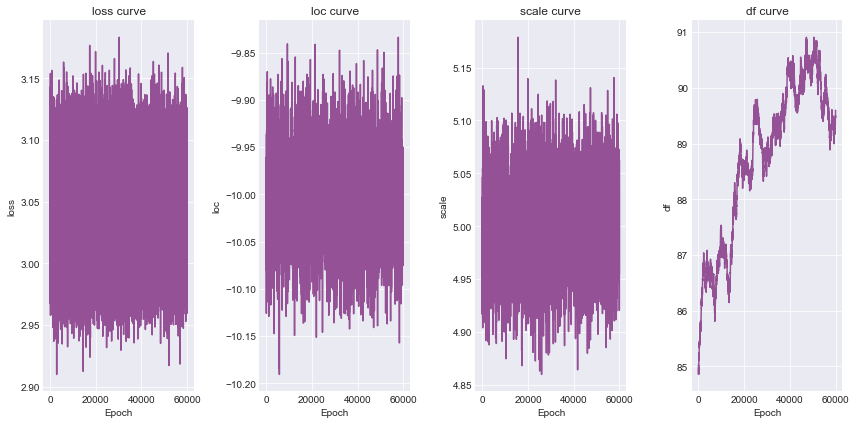

In [31]:
plot_stats(stats)